In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import sympy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# 3. Exchange economy

Consider an **exchange economy** with

1. 3 goods, $(x_1,x_2,x_3)$
2. $N$ consumers indexed by \\( j \in \{1,2,\dots,N\} \\)
3. Preferences are Cobb-Douglas with log-normally distributed coefficients

    $$ \begin{eqnarray*}
    u^{j}(x_{1},x_{2},x_{3}) &=& 
    \left(x_{1}^{\beta_{1}^{j}}x_{2}^{\beta_{2}^{j}}x_{3}^{\beta_{3}^{j}}\right)^{\gamma}\\
     &  & \,\,\,\beta_{i}^{j}=\frac{\alpha_{i}^{j}}{\alpha_{1}^{j}+\alpha_{2}^{j}+\alpha_{3}^{j}} \\
     &  & \,\,\,\boldsymbol{\alpha}^{j}=(\alpha_{1}^{j},\alpha_{2}^{j},\alpha_{3}^{j}) \\ 
     &  & \,\,\,\log(\boldsymbol{\alpha}^j) \sim \mathcal{N}(\mu,\Sigma) \\
    \end{eqnarray*} $$

4. Endowments are exponentially distributed,

$$
\begin{eqnarray*}
\boldsymbol{e}^{j} &=& (e_{1}^{j},e_{2}^{j},e_{3}^{j}) \\
 &  & e_i^j \sim f, f(z;\zeta) =  1/\zeta \exp(-z/\zeta)
\end{eqnarray*}
$$

Let $p_3 = 1$ be the **numeraire**. The implied **demand functions** are:

$$
\begin{eqnarray*}
x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j})&=&\beta^{j}_i\frac{I^j}{p_{i}} \\
\end{eqnarray*}
$$

where consumer $j$'s income is

$$I^j = p_1 e_1^j + p_2 e_2^j +p_3 e_3^j$$

The **parameters** and **random preferences and endowments** are given by:

In [2]:
# a. parameters
N = 50000
mu = np.array([3,2,1])
Sigma = np.array([[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.25]])
gamma = 0.8
zeta = 1

# b. random draws
seed = 1986
np.random.seed(seed)

# preferences
alphas = np.exp(np.random.multivariate_normal(mu, Sigma, size=N))
betas = alphas/np.reshape(np.sum(alphas,axis=1),(N,1))

# endowments
e1 = np.random.exponential(zeta,size=N)
e2 = np.random.exponential(zeta,size=N)
e3 = np.random.exponential(zeta,size=N)

**Question 1:** Plot the histograms of the budget shares for each good across agents.

To plot the budget shares, we define each individual budget share $\beta_i$ from betas, and plot these in a figure with all betas and create an interactive figure to choose each one individually

In [3]:
#First we define beta one, two and three (Index starts with 0)
beta_1 = betas[:,0]
beta_2 = betas[:,1]
beta_3 = betas[:,2]

In [4]:
#Secondly we define a DataFrame with each beta
Budget_share = pd.DataFrame([beta_1,beta_2,beta_3])

#And transpose
Budget_share = pd.DataFrame(Budget_share).transpose()

#Rename the coloumns
Budget_share = pd.DataFrame(Budget_share).rename(columns={0:"beta_1",1:"beta_2",2:"beta_3"})

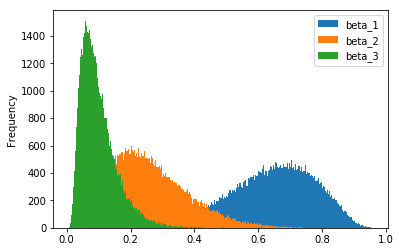

In [5]:
#Plotting the beta's against each other
Budget_share.plot.hist(bins=300)

In [6]:
#Define a functions that creates the figure for each beta. 
def budget_share(beta_value):
    pd.DataFrame(Budget_share).hist(column=beta_value,bins=100)
    plt.xlabel('Budget share value')
    plt.ylabel('Number of persons')
    plt.title(f'Budget share across agents for {str(beta_value)}')
    plt.grid(True)
    return plt.show()

In [7]:
#Create an interactive figure that shows the distribution for each beta (Beware of the changeing axis)
widgets.interact(budget_share,
                 beta_value = widgets.Dropdown(options=["beta_1","beta_2","beta_3"]))

interactive(children=(Dropdown(description='beta_value', options=('beta_1', 'beta_2', 'beta_3'), value='beta_1…

<function __main__.budget_share(beta_value)>

#### Comments for the histograms: 

It appears that the agents have a preference for good one, as beta_1 has the hig expected value, even though it also has a large spread. Good three is generally not preferred with a very low expected value and low spread. Finally good two has a low expected value, but also a relatively large spread.

Consider the **excess demand functions:**

$z_i(p_1,p_2) = \sum_{j=1}^N x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j}) - e_i^j$

**Question 2:** Plot the excess demand functions.

To plot the excess demand functions, we first define the demand functions for each good, and thereafter create a function for each individual excess demand. Finally these are plotted. (The DataFrame method is not as suitable for this task, so we use numpy grids)

In [8]:
#First we define the demand functions
def demand_func1(beta_1,p1,p2,e1,e2,e3):
    I = p1*e1+p2*e2+e3
    return betas[:,0]*I/p1
def demand_func2(beta_2,p1,p2,e1,e2,e3):
    I = p1*e1+p2*e2+e3
    return betas[:,1]*I/p2
def demand_func3(beta_3, p1,p2,e1,e2,e3):
    I = p1*e1+p2*e2+e3
    return betas[:,2]*I/1

In [9]:
#Secondly, we can define the excess demand functions
def excess_demand1(betas,p1,p2,e1,e2,e3):
    demand1 = np.sum(demand_func1(betas,p1,p2,e1,e2,e3))
    supply1 = np.sum(e1)
    excess_demand = demand1-supply1
    return excess_demand 
    
def excess_demand2(betas,p1,p2,e1,e2,e3):
    demand2 = np.sum(demand_func2(betas,p1,p2,e1,e2,e3))
    supply2 = np.sum(e2)
    excess_demand  = demand2-supply2
    return excess_demand

def excess_demand3(betas,p1,p2,e1,e2,e3):
    demand3 = np.sum(demand_func3(betas,p1,p2,e1,e2,e3))
    supply3 = np.sum(e3)
    excess_demand = demand3-supply3
    return excess_demand

In [10]:
#Thirdly, we define the prices. First by defineing the numpy arrays for each price, thereafter create empty grids and insert them by mesh and enumerate. 
size = 100
p1_gen = np.linspace(1,10,size)
p2_gen = np.linspace(1,10,size)

p1_empty_grid = np.empty((size,size))
p2_empty_grid = np.empty((size,size))

p1_grid, p2_grid = np.meshgrid(p1_gen,p2_gen)
for i, p1 in enumerate(p1_gen):
    for j, p2 in enumerate(p2_gen):
        p1_empty_grid[i,j] = excess_demand1(betas,p1,p2,e1,e2,e3) 
        p2_empty_grid[i,j] = excess_demand2(betas,p1,p2,e1,e2,e3)

Text(0.5, 0, '$p_2$')

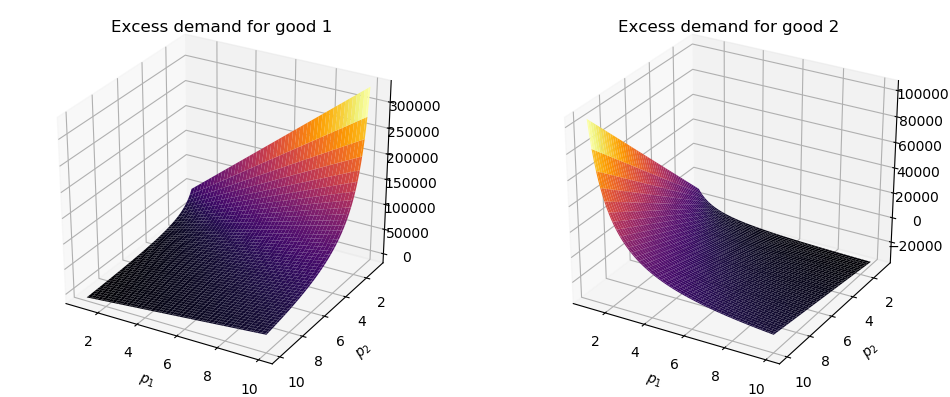

In [11]:
#Now that we have the data, we just need to plot it
#Plotting for excess good 1
fig = plt.figure(dpi=100, figsize=(12,5))
axis1 = fig.add_subplot(121, projection = '3d')
fig1 = axis1.plot_surface(p1_grid, p2_grid, p1_empty_grid, cmap=plt.cm.inferno)
axis1.invert_yaxis()
axis1.set_title('Excess demand for good 1')
axis1.set_xlabel('$p_1$')
axis1.set_ylabel('$p_2$')


#And the excess for good 2 
axis2 = fig.add_subplot(122, projection = '3d')
fig2 = axis2.plot_surface(p1_grid, p2_grid, p2_empty_grid, cmap=plt.cm.inferno)
axis2.invert_yaxis()
axis2.set_title('Excess demand for good 2')
axis2.set_xlabel('$p_1$')
axis2.set_ylabel('$p_2$')

#### Conclusions for excess demand plots:
First of all, its important to beware of the change in axis labels on the z axis. Furthermore, the opvious difference between the figures is the direction of the plot. Where the excess demand of good 1 increases with an increase in p1 and a decrease in p2, the excess demand of good 2 increases when p1 decreases and p2 increases. This makes sense, as the excess demand follows the goods own price for both goods.

**Question 3:** Find the Walras-equilibrium prices, $(p_1,p_2)$, where both excess demands are (approximately) zero, e.g. by using the following tâtonnement process:

1. Guess on $p_1 > 0$, $p_2 > 0$ and choose tolerance $\epsilon > 0$ and adjustment aggressivity parameter, $\kappa > 0$.
2. Calculate $z_1(p_1,p_2)$ and $z_2(p_1,p_2)$.
3. If $|z_1| < \epsilon$ and $|z_2| < \epsilon$ then stop.
4. Else set $p_1 = p_1 + \kappa \frac{z_1}{N}$ and $p_2 = p_2 + \kappa \frac{z_2}{N}$ and return to step 2.

The solution for this question, and the following two, relies heavily on the code from problemset 2. We assume the Walras-equilibrium is found where demand for good three is zero.  

In [12]:
#As most parameters and the demand and excess demand functions are already set up, we start by defineing the equilibirum function as in problemset 2
def find_equilibrium(alphas,p1,p2,e1,e2,e3,kappa=0.5,eps=1e-8,maxiter=500):
    
    t = 0
    while True:
        # a. step 1: define excess demand
        Z1 = excess_demand1(alphas,p1,p2,e1,e2,e3)
        Z2 = excess_demand2(alphas,p1,p2,e1,e2,e3)
        
        # b: step 2: Define when to stop?
        if  np.abs(Z1) < eps and np.abs(Z2) < eps and t >= maxiter:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {Z1:14.8f} and p2 = {p2:18.8f} -> excess demand {Z2:14.8f}')
            break    
        # c. step 3: update p1 and p2
        p1 = p1 + kappa*Z1/alphas.size
        p2 = p2 + kappa*Z2/alphas.size
        
        # d. step 4: make function return values for both p1 and p2 with modified iteration printout   
        if t < 5 or t%500 == 0:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {Z1:14.8f} and p2 = {p2:18.8f} -> excess demand {Z2:14.8f}')
        elif t == 5:
            print('   ...')
        t += 1    


# e. call find equilibrium function with defined parameters
p1 = 1
p2 = 1
kappa = 0.5
eps = 1e-8
p1 = find_equilibrium(alphas,p1,p2,e1,e2,e3,kappa=kappa,eps=eps)


  0: p1 =   1.15434354 -> excess demand -> 46303.06210182 and p2 =         0.96327349 -> excess demand -11017.95327569
  1: p1 =   1.27671409 -> excess demand -> 36711.16402205 and p2 =         0.93670601 -> excess demand -7970.24375230
  2: p1 =   1.37944193 -> excess demand -> 30818.35277116 and p2 =         0.91847489 -> excess demand -5469.33650090
  3: p1 =   1.46868506 -> excess demand -> 26772.93962492 and p2 =         0.90711916 -> excess demand -3406.71837664
  4: p1 =   1.54806962 -> excess demand -> 23815.36779893 and p2 =         0.90137981 -> excess demand -1721.80611963
   ...
500: p1 =   5.93547693 -> excess demand ->   555.09286573 and p2 =         2.40971084 -> excess demand   207.27799461
1000: p1 =   6.37712322 -> excess demand ->   105.23505785 and p2 =         2.57456027 -> excess demand    39.26553955
1500: p1 =   6.46578148 -> excess demand ->    22.31026660 and p2 =         2.60763836 -> excess demand     8.32331914
2000: p1 =   6.48478182 -> excess demand ->   

#### Conclusions for equilibrium prices:
With the demand for good 3 being zero, we get a Walras-equilibrium where **p1 = approx. 6.49 and p2 = approx 2.62**  

**Question 4:** Plot the distribution of utility in the Walras-equilibrium and calculate its mean and variance.

To plot the distribution of utility in the Walras-equilibrium, we generate the function for utility as seen in the start of the task, and use the prices found in Q3 to find the different distributions. <br/>

We do this by defining the demand functions for each good, multiply with the beta values for each good, and return it all through the generated utility function. Finally we plot the results with the DataFrame method as Q1. We thereafter use numpy to find mean, median, variance, and max.

In [13]:
#First generate the demandfunctions and the beta functions, afterwards we 
def Walras_equilibrium_utilityfunction(betas,p1,p2,e1,e2,e3,gamma):
    Demand1 = demand_func1(beta_1,p1,p2,e1,e2,e3)
    Demand2 = demand_func2(beta_1,p1,p2,e1,e2,e3)
    Demand3 = demand_func3(beta_1,p1,p2,e1,e2,e3)
    
    Beta1 = np.array([x[0] for x in betas])
    Beta2 = np.array([x[1] for x in betas])
    Beta3 = np.array([x[2] for x in betas])
    
    return ((Demand1*Beta1)*(Demand2*Beta2)*(Demand3*Beta3))**gamma

[0, 2, 0, 6]

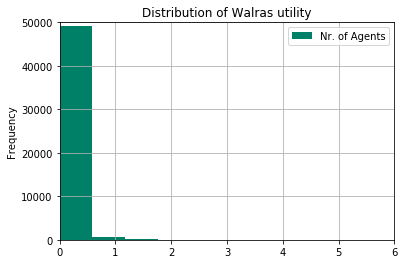

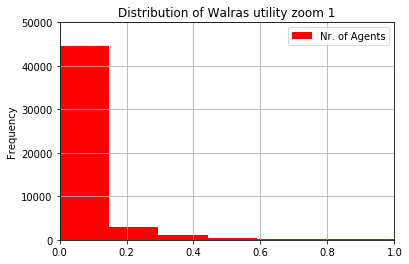

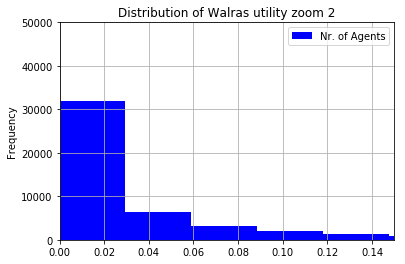

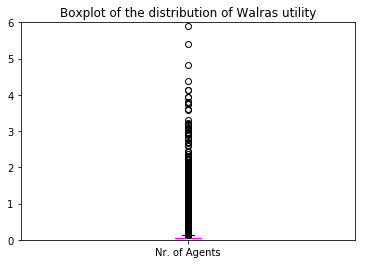

In [14]:
#Secondly we define our prices from Q3, run them through our Walras-Utilityfunction and plot the results using pandas.
p1 = 6.490
p2 = 2.617
Walras_data_func = Walras_equilibrium_utilityfunction(betas,p1,p2,e1,e2,e3,gamma)
Walras_data = pd.DataFrame(Walras_data_func).rename(columns={0:'Nr. of Agents'})

pd.DataFrame(Walras_data).plot(kind="hist",title="Distribution of Walras utility",grid=True,bins=10, cmap=plt.cm.summer)
plt.axis([0,6,0,50000])

pd.DataFrame(Walras_data).plot(kind="hist",title="Distribution of Walras utility zoom 1",grid=True,bins=40, cmap=plt.cm.autumn)
plt.axis([0,1,0,50000])

pd.DataFrame(Walras_data).plot(kind="hist",title="Distribution of Walras utility zoom 2",grid=True,bins=200, cmap=plt.cm.winter)
plt.axis([0,0.15,0,50000])

pd.DataFrame(Walras_data).plot(kind="box",title="Boxplot of the distribution of Walras utility", cmap=plt.cm.spring)
plt.axis([0,2,0,6])

In [15]:
#Finally we simply calculate mean and variance, and max, using numpy
print("The mean is ", np.mean(Walras_data_func))
print("The median is", np.median(Walras_data_func))
print("The varianse is", np.var(Walras_data_func))
print("The highest observation is ", np.max(Walras_data_func))

The mean is  0.06535541853385282
The median is 0.014873998664104271
The varianse is 0.03134762216019003
The highest observation is  5.897938370865469


#### Conclusions on Q4:
We find that the vast majority of the Walras utilities gater in the low end of the distribution with a rather low varianse. The highest observed utility is around 5.89, which is much higher than the mean. As the median is lower than the mean, this indicates right skewedness, which is also clear from the boxplot, or lack of one, due to frequent outliers in the high end og the values.  

**Question 5:** Find the Walras-equilibrium prices if instead all endowments were distributed equally. Discuss the implied changes in the distribution of utility. Does the value of $\gamma$ play a role for your conclusions?

To find the Walras-equilibrium prices for equally distributed endownments, the endownments are redefined as the mean of their individual values, and put through the same process as Q2, Q3 and Q4. Finally, we create a interactive figure to show the effects of changes in gamma on the distribution of utility. 

In [16]:
#Redefine each endownment using numpy taking the mean and using np.zeros so an array is generated insted of a single value  
e1 = np.mean(e1)+np.zeros(N)
e2 = np.mean(e2)+np.zeros(N)
e3 = np.mean(e3)+np.zeros(N)

In [17]:
#Same procedure as Q2,Q3 and Q4:
#First we define the demand functions
def demand_func1(beta_1,p1,p2,e1,e2,e3):
    I = p1*e1+p2*e2+e3
    return betas[:,0]*I/p1
def demand_func2(beta_2,p1,p2,e1,e2,e3):
    I = p1*e1+p2*e2+e3
    return betas[:,1]*I/p2
def demand_func3(beta_3, p1,p2,e1,e2,e3):
    I = p1*e1+p2*e2+e3
    return betas[:,2]*I/1

In [18]:
#Secondly, we can define the excess demand functions
def excess_demand1(betas,p1,p2,e1,e2,e3):
    demand1 = np.sum(demand_func1(betas,p1,p2,e1,e2,e3))
    supply1 = np.sum(e1)
    excess_demand = demand1-supply1
    return excess_demand 
    
def excess_demand2(betas,p1,p2,e1,e2,e3):
    demand2 = np.sum(demand_func2(betas,p1,p2,e1,e2,e3))
    supply2 = np.sum(e2)
    excess_demand  = demand2-supply2
    return excess_demand

def excess_demand3(betas,p1,p2,e1,e2,e3):
    demand3 = np.sum(demand_func3(betas,p1,p2,e1,e2,e3))
    supply3 = np.sum(e3)
    excess_demand = demand3-supply3
    return excess_demand

In [19]:
#As most parameters and the demand and excess demand functions are already set up, we start by defineing the equilibirum function as in problemset 2
def find_equilibrium(alphas,p1,p2,e1,e2,e3,kappa=0.5,eps=1e-8,maxiter=500):
    
    t = 0
    while True:
        # a. step 1: define excess demand
        Z1 = excess_demand1(alphas,p1,p2,e1,e2,e3)
        Z2 = excess_demand2(alphas,p1,p2,e1,e2,e3)
        
        # b: step 2: Define when to stop?
        if  np.abs(Z1) < eps and np.abs(Z2) < eps and t >= maxiter:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {Z1:14.8f} and p2 = {p2:18.8f} -> excess demand {Z2:14.8f}')
            break    
        # c. step 3: update p1 and p2
        p1 = p1 + kappa*Z1/alphas.size
        p2 = p2 + kappa*Z2/alphas.size
        
        # d. step 4: make function return values for both p1 and p2 with modified iteration printout   
        if t < 5 or t%500 == 0:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {Z1:14.8f} and p2 = {p2:18.8f} -> excess demand {Z2:14.8f}')
        elif t == 5:
            print('   ...')
        t += 1    


# e. call find equilibrium function with defined parameters
p1 = 1
p2 = 1
kappa = 0.5
eps = 1e-8
p1 = find_equilibrium(alphas,p1,p2,e1,e2,e3,kappa=kappa,eps=eps)


  0: p1 =   1.15443484 -> excess demand -> 46330.45322633 and p2 =         0.96321076 -> excess demand -11036.77294234
  1: p1 =   1.27685472 -> excess demand -> 36725.96313815 and p2 =         0.93659869 -> excess demand -7983.62083163
  2: p1 =   1.37961171 -> excess demand -> 30827.09694193 and p2 =         0.91833778 -> excess demand -5478.27168623
  3: p1 =   1.46887242 -> excess demand -> 26778.21126920 and p2 =         0.90696448 -> excess demand -3411.99200640
  4: p1 =   1.54826733 -> excess demand -> 23818.47424070 and p2 =         0.90121737 -> excess demand -1724.13206651
   ...
500: p1 =   5.93315437 -> excess demand ->   554.03181223 and p2 =         2.41062773 -> excess demand   207.16645183
1000: p1 =   6.37364924 -> excess demand ->   104.82980595 and p2 =         2.57527414 -> excess demand    39.16838681
1500: p1 =   6.46189659 -> excess demand ->    22.17738553 and p2 =         2.60824444 -> excess demand     8.28518999
2000: p1 =   6.48076821 -> excess demand ->   

The new prices are **p1 = 6.486 and p2 = 2.617**

In [68]:
#Now generate the new demandfunctions and the beta functions 
def Walras_equalendownment_equilibrium_utilityfunction(betas,p1,p2,e1,e2,e3,gamma):
    Demand1 = demand_func1(betas,p1,p2,e1,e2,e3)
    Demand2 = demand_func2(betas,p1,p2,e1,e2,e3)
    Demand3 = demand_func3(betas,p1,p2,e1,e2,e3)
    
    Beta1 = np.array([x[0] for x in betas])
    Beta2 = np.array([x[1] for x in betas])
    Beta3 = np.array([x[2] for x in betas])
    
    return ((Demand1*Beta1)*(Demand2*Beta2)*(Demand3*Beta3))**gamma

[0, 2, 0, 0.15]

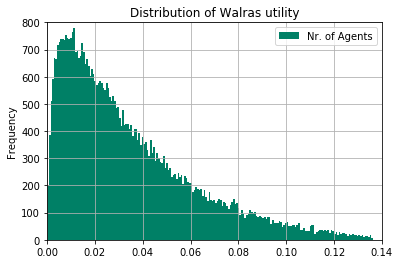

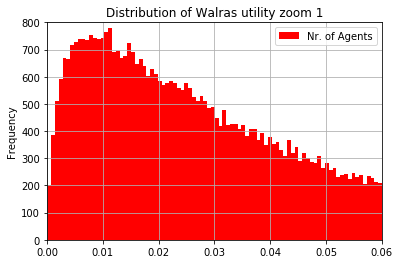

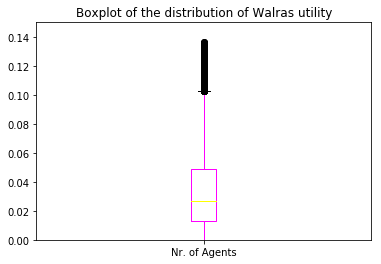

In [69]:
#Finally we define our prices from Q3, run them through our Walras-Utilityfunction and plot the results using pandas.
p1 = 6.486
p2 = 2.617
Walras_data_func = Walras_equalendownment_equilibrium_utilityfunction(betas,p1,p2,e1,e2,e3,gamma)
Walras_data = pd.DataFrame(Walras_data_func).rename(columns={0:'Nr. of Agents'})

pd.DataFrame(Walras_data).plot(kind="hist",title="Distribution of Walras utility",grid=True,bins=200, cmap=plt.cm.summer)
plt.axis([0,0.14,0,800])

pd.DataFrame(Walras_data).plot(kind="hist",title="Distribution of Walras utility zoom 1",grid=True,bins=200, cmap=plt.cm.autumn)
plt.axis([0,0.06,0,800])

pd.DataFrame(Walras_data).plot(kind="box",title="Boxplot of the distribution of Walras utility", cmap=plt.cm.spring)
plt.axis([0,2,0,0.15])

In [72]:
#Again we simply calculate mean, median, variance, and max, using numpy
print("The mean is ", np.mean(Walras_data_func))
print("The median is", np.median(Walras_data_func))
print("The varianse is", np.var(Walras_data_func))
print("The highest observation is ", np.max(Walras_data_func))

The mean is  0.03440934151059249
The median is 0.026899972248576272
The varianse is 0.000759513584718288
The highest observation is  0.1363094967261889


In [93]:
#And to add a little extra interpretation of the value of gamma, create a interactive figure to see the difference
def Walras_equalendow_slider_func(betas,p1,p2,e1,e2,e3,gamma):
    
    Demand1 = demand_func1(betas,p1,p2,e1,e2,e3)
    Demand2 = demand_func2(betas,p1,p2,e1,e2,e3)
    Demand3 = demand_func3(betas,p1,p2,e1,e2,e3)
    
    Beta1 = np.array([x[0] for x in betas])
    Beta2 = np.array([x[1] for x in betas])
    Beta3 = np.array([x[2] for x in betas])
    
    final = ((Demand1*Beta1)*(Demand2*Beta2)*(Demand3*Beta3))**gamma
    final = pd.DataFrame(final).rename(columns={0:'Nr. of Agents'})
    pd.DataFrame(final).plot(kind="hist",title="Distribution of Walras utility given different gammas",grid=True, cmap=plt.cm.ocean)
    
    return plt.show()
    
    
widgets.interact(Walras_equalendow_slider_func, 
                 betas=fixed(betas),
                 p1 = fixed(p1),
                 p2 = fixed(p2),
                 e1 = fixed(e1),
                 e2 = fixed(e2),
                 e3 = fixed(e3),
                 gamma=(0.1,1.5,0.1))

interactive(children=(FloatSlider(value=0.7000000000000001, description='gamma', max=1.5, min=0.1), Output()),…

<function __main__.Walras_equalendow_slider_func(betas, p1, p2, e1, e2, e3, gamma)>

#### Conclusions for Q5:

As can we seen from both the new figures, and calculations, the mean and median are both lower, but the right skewedness is still present. The variance is much lower, and the highest observation is also much lower.